In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import preprocessing as prepro
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.regularizers import l1, l2
from keras.optimizers import Adam, SGD
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from collections import Counter

In [3]:
estimated = pd.read_csv('estimated_numbers.csv')
incidence = pd.read_csv('incidence_per_1000_pop_at_risk.csv')
reported = pd.read_csv('reported_numbers.csv')
test = incidence[:107]

In [4]:
reported = pd.concat([reported, pd.get_dummies(reported['Country'])], axis=1)

In [5]:

cols = ['Country', 'WHO Region']
for col in cols:
    le = LabelEncoder()
    letest = LabelEncoder()
    reported[col] = le.fit_transform(reported[col])

In [6]:
reported['Incidence'] = (incidence['No. of cases'][107:]).reset_index(drop=True)
reported['Cases bin'] = pd.cut(reported['No. of cases'], bins=[0, 100, 1000, 10000, 100000, 1000000, 16000000], labels=[0, 1, 2, 3, 4, 5]).fillna(0)
reported['Incidence bin'] = pd.cut(reported['Incidence'], bins=[0, 0.3, 5, 45, 250, 800], labels=[0, 1, 2, 3, 4]).fillna(0)
reported = reported.fillna(0)

In [7]:
reported['Log no. of cases'] = (reported['No. of cases']+1).transform(np.log)
reported['Box Cox no. of cases'] = stats.boxcox(reported['No. of cases']+1)[0]

reported['Log WHO Region'] = (reported['WHO Region']+1).transform(np.log)
reported['Box Cox WHO Region'] = stats.boxcox(reported['WHO Region']+1)[0]

reported['Log Incidence'] = (reported['Incidence']+1).transform(np.log)
reported['Box Cox Incidence'] = stats.boxcox(reported['Incidence']+1)[0]

In [8]:
reported['Cases minmax'] = prepro.minmax_scale(reported[['No. of cases']])
reported['Cases standardized'] = prepro.StandardScaler().fit_transform(reported[['No. of cases']])
reported['Cases l2'] = prepro.normalize(reported[['No. of cases']])

reported['Incidence minmax'] = prepro.minmax_scale(reported[['Incidence']])
reported['Incidence standardized'] = prepro.StandardScaler().fit_transform(reported[['Incidence']])
reported['Incidence l2'] = prepro.normalize(reported[['Incidence']])

In [9]:
y = reported['No. of deaths']
X = reported.drop('No. of deaths', axis=1).reset_index(drop=True)

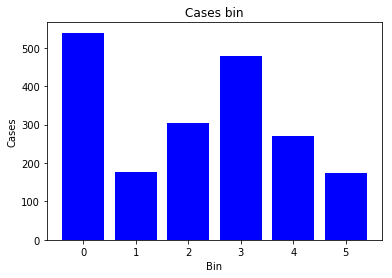

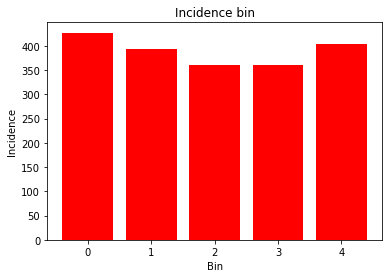

In [10]:
count=Counter(reported['Cases bin'])
plt.bar(count.keys(), count.values(), color='blue')
plt.title('Cases bin')
plt.ylabel('Cases')
plt.xlabel('Bin')
plt.show()

count=Counter(reported['Incidence bin'])
plt.bar(count.keys(), count.values(), color='red')
plt.title('Incidence bin')
plt.ylabel('Incidence')
plt.xlabel('Bin')
plt.show()


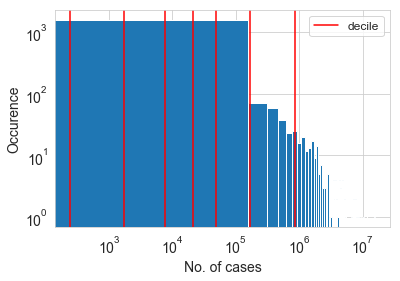

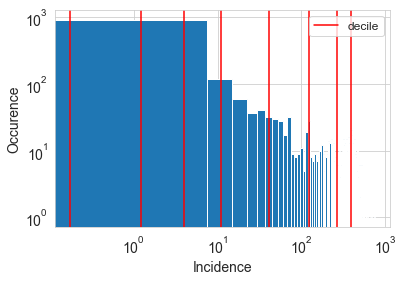

In [11]:
cases_decile = reported['No. of cases'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)
reported['No. of cases'].hist(ax=ax, bins=100)
for pos in cases_decile:
    handle = plt.axvline(pos, color='r')
    
ax.legend([handle], ['decile'], fontsize=12)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('No. of cases', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)
plt.show()

incidence_decile = reported['Incidence'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1)
reported['Incidence'].hist(ax=ax, bins=100)
for pos in incidence_decile:
    handle = plt.axvline(pos, color='r')
    
ax.legend([handle], ['decile'], fontsize=12)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Incidence', fontsize=14)
ax.set_ylabel('Occurence', fontsize=14)
plt.show()


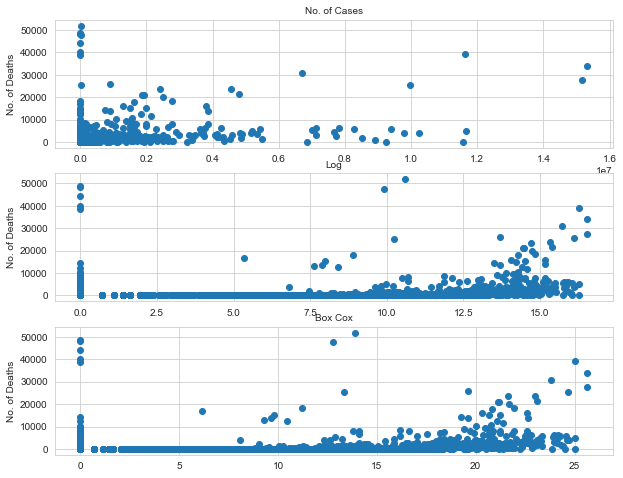

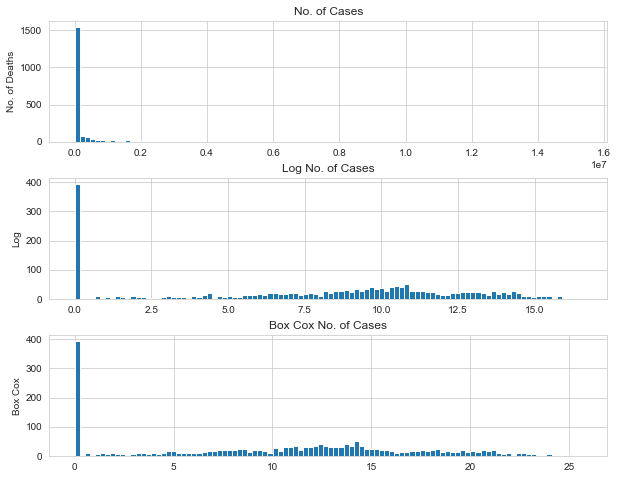

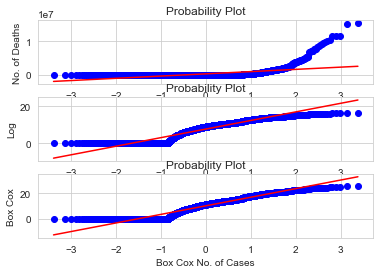

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

ax1.scatter(X['No. of cases'], y)
ax1.set_title('No. of Cases', fontsize=10)
ax1.set_ylabel('No. of Deaths', fontsize=10)

ax2.scatter(X['Log no. of cases'], y)
ax2.set_title('Log', fontsize=10)
ax2.set_ylabel('No. of Deaths', fontsize=10)

ax3.scatter(stats.boxcox(reported['No. of cases']+1)[0], y)
ax3.set_title('Box Cox', fontsize=10)
ax3.set_ylabel('No. of Deaths', fontsize=10)

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

X['No. of cases'].hist(ax=ax1, bins=100)
ax1.set_title('No. of Cases')
ax1.set_ylabel('No. of Deaths')

X['Log no. of cases'].hist(ax=ax2, bins=100)
ax2.set_title('Log No. of Cases')
ax2.set_ylabel('Log')

pd.DataFrame(stats.boxcox(reported['No. of cases']+1)[0]).hist(ax=ax3, bins=100)
ax3.set_title('Box Cox No. of Cases')
ax3.set_ylabel('Box Cox')

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

prob1 = stats.probplot(X['No. of cases'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('No. of Cases')
ax1.set_ylabel('No. of Deaths')

prob2 = stats.probplot(X['Log no. of cases'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('Log No. of Cases')
ax2.set_ylabel('Log')

prob3 = stats.probplot(stats.boxcox(reported['No. of cases']+1)[0], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Box Cox No. of Cases')
ax3.set_ylabel('Box Cox')

plt.show()

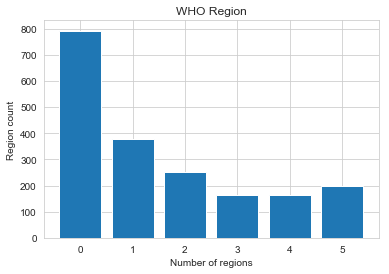

In [13]:
count = Counter(X['WHO Region'])
plt.bar(count.keys(), count.values())
plt.title('WHO Region')
plt.xlabel('Number of regions')
plt.ylabel('Region count')
plt.show()

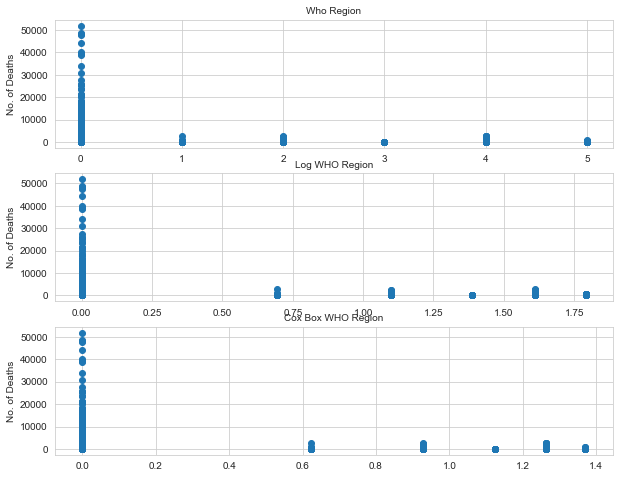

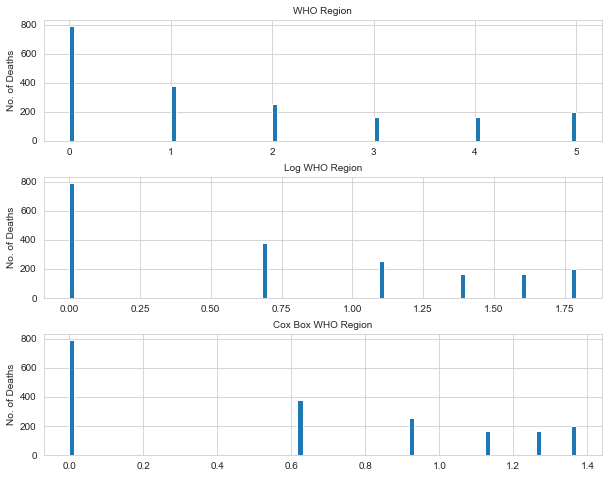

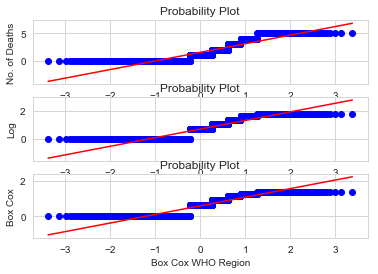

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

ax1.scatter(X['WHO Region'], y)
ax1.set_title('Who Region', fontsize=10)
ax1.set_ylabel('No. of Deaths', fontsize=10)

ax2.scatter(X['Log WHO Region'], y)
ax2.set_title('Log WHO Region', fontsize=10)
ax2.set_ylabel('No. of Deaths', fontsize=10)

ax3.scatter(stats.boxcox(X['WHO Region']+1)[0], y)
ax3.set_title('Cox Box WHO Region', fontsize=10)
ax3.set_ylabel('No. of Deaths', fontsize=10)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

X['WHO Region'].hist(ax=ax1, bins=100)
ax1.set_title('WHO Region', fontsize=10)
ax1.set_ylabel('No. of Deaths', fontsize=10)

X['Log WHO Region'].hist(ax=ax2, bins=100)
ax2.set_title('Log WHO Region', fontsize=10)
ax2.set_ylabel('No. of Deaths', fontsize=10)

pd.DataFrame(stats.boxcox(X['WHO Region']+1)[0]).hist(ax=ax3, bins=100)
ax3.set_title('Cox Box WHO Region', fontsize=10)
ax3.set_ylabel('No. of Deaths', fontsize=10)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

prob1 = stats.probplot(X['WHO Region'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('WHO Region')
ax1.set_ylabel('No. of Deaths')

prob2 = stats.probplot(X['Log WHO Region'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('Log WHO Region')
ax2.set_ylabel('Log')

prob3 = stats.probplot(stats.boxcox(reported['WHO Region']+1)[0], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Box Cox WHO Region')
ax3.set_ylabel('Box Cox')

plt.show()

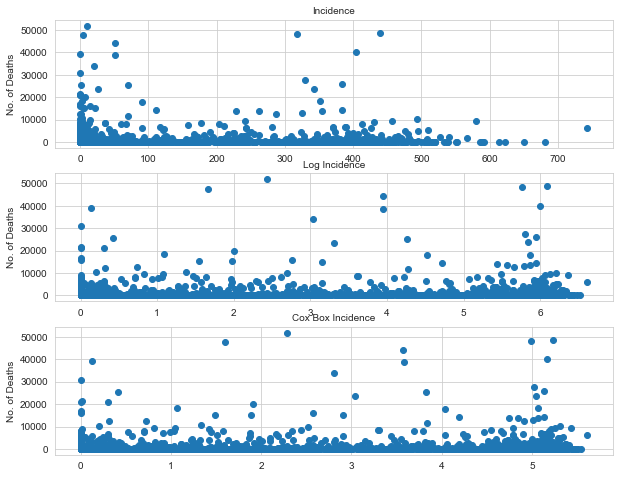

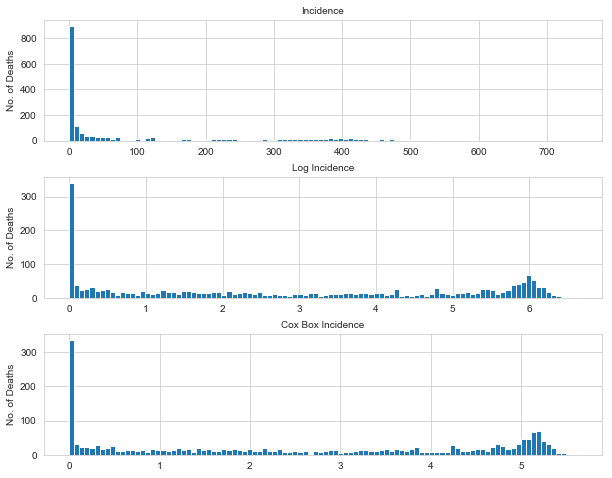

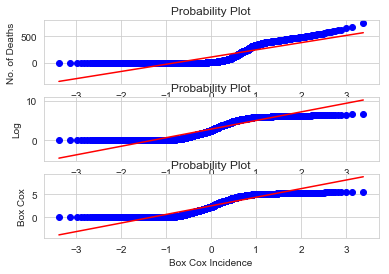

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

ax1.scatter(X['Incidence'], y)
ax1.set_title('Incidence', fontsize=10)
ax1.set_ylabel('No. of Deaths', fontsize=10)

ax2.scatter(X['Log Incidence'], y)
ax2.set_title('Log Incidence', fontsize=10)
ax2.set_ylabel('No. of Deaths', fontsize=10)

ax3.scatter(stats.boxcox(X['Incidence']+1)[0], y)
ax3.set_title('Cox Box Incidence', fontsize=10)
ax3.set_ylabel('No. of Deaths', fontsize=10)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

X['Incidence'].hist(ax=ax1, bins=100)
ax1.set_title('Incidence', fontsize=10)
ax1.set_ylabel('No. of Deaths', fontsize=10)

X['Log Incidence'].hist(ax=ax2, bins=100)
ax2.set_title('Log Incidence', fontsize=10)
ax2.set_ylabel('No. of Deaths', fontsize=10)

pd.DataFrame(stats.boxcox(X['Incidence']+1)[0]).hist(ax=ax3, bins=100)
ax3.set_title('Cox Box Incidence', fontsize=10)
ax3.set_ylabel('No. of Deaths', fontsize=10)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

prob1 = stats.probplot(X['Incidence'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('Incidence')
ax1.set_ylabel('No. of Deaths')

prob2 = stats.probplot(X['Log Incidence'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('Log Incidence')
ax2.set_ylabel('Log')

prob3 = stats.probplot(stats.boxcox(reported['Incidence']+1)[0], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Box Cox Incidence')
ax3.set_ylabel('Box Cox')

plt.show()

In [16]:

X['Cases bin'] = X['Cases bin'].astype('float64')
X['Incidence bin'] = X['Incidence bin'].astype('float64')

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
X_train = prepro.minmax_scale(X_train)
X_val = prepro.minmax_scale(X_val)

C:\Users\aaddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64.
  
C:\Users\aaddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:

model = Sequential()

model.add(Dense(128, activation='relu', kernel_regularizer=l2(1.0), kernel_initializer='RandomUniform', input_dim=127))
model.add(BatchNormalization())
model.add(Dropout(0.325))

model.add(Dense(86, activation='relu', kernel_regularizer=l2(1.0), kernel_initializer='RandomUniform'))
model.add(BatchNormalization())
model.add(Dropout(0.325))

model.add(Dense(58, activation='relu', kernel_regularizer=l2(1.0), kernel_initializer='RandomUniform'))
model.add(BatchNormalization())
model.add(Dropout(0.325))

model.add(Dense(1, activation='sigmoid'))

model.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer=Adam(lr=0.0001, epsilon=2e-06))
history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=98, batch_size=32, steps_per_epoch=100)

for j in history.history:
    plt.figure(figsize=(3, 3))
    plt.xlabel('Epochs')
    plt.ylabel(j)
    plt.title(j + ' over epochs')
    plt.plot(history.history[j])
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1555 samples, validate on 389 samples


ValueError: Must specify `validation_steps` to perform validation when doing step-wise training.

In [19]:
score = model.evaluate(X_val, y_val)
print('Accuracy: ' + str(score[1]) + ' Loss: ' + str(score[0]))

389/389 [==============================] - 0s 574us/step
Accuracy: 0.305912584066391 Loss: 29.657884534036594
